# 처음부터 끝까지 곧바로 실행하시면 됩니다.

## 라이브러리

In [1]:
pip freeze

absl-py==0.10.0
alembic==1.4.1
argon2-cffi==20.1.0
asn1crypto==0.24.0
astunparse==1.6.3
async-generator==1.10
attrs==20.3.0
backcall==0.2.0
beautifulsoup4==4.6.0
bleach==3.3.0
blis==0.7.4
Boruta==0.3
cachetools==4.2.0
catalogue==1.0.0
catboost==0.24.4
certifi==2020.12.5
cffi==1.14.5
chardet==4.0.0
click==7.1.2
cloudpickle==1.6.0
colorama==0.4.4
colorlover==0.3.0
confuse==1.4.0
cryptography==2.1.4
cufflinks==0.17.3
cycler==0.10.0
cymem==2.0.5
databricks-cli==0.14.2
dataclasses==0.8
decorator==4.4.2
defusedxml==0.6.0
dill==0.3.3
docker==4.4.4
entrypoints==0.3
et-xmlfile==1.0.1
filelock==3.4.1
Flask==1.1.2
flatbuffers==1.12
funcy==1.15
future==0.18.2
gast==0.3.3
gaussian==0.1
gdown==4.4.0
gensim==3.8.3
gitdb==4.0.5
GitPython==3.1.13
google-auth==1.24.0
google-auth-oauthlib==0.4.2
google-pasta==0.2.0
googleapis-common-protos==1.53.0
graphviz==0.16
grpcio==1.32.0
gunicorn==20.0.4
h5py==2.10.0
htmlmin==0.1.12
hyperopt==0.2.5
idna==2.6
ImageHash==4.2.0
imbalanced-learn==0.7.0
importlib-metada

In [2]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install -r requirements.txt

  Cloning https://github.com/haven-jeon/PyKoSpacing.git (to revision 1a36be492cc396559e7dce7825843af020ea231f) to /tmp/pip-install-vulra3e5/pykospacing_93d2bd87749b4a449cdf254af9bce07b
  Running command git clone -q https://github.com/haven-jeon/PyKoSpacing.git /tmp/pip-install-vulra3e5/pykospacing_93d2bd87749b4a449cdf254af9bce07b
  Running command git rev-parse -q --verify 'sha^1a36be492cc396559e7dce7825843af020ea231f'
  Running command git fetch -q https://github.com/haven-jeon/PyKoSpacing.git 1a36be492cc396559e7dce7825843af020ea231f
  Running command git checkout -q 1a36be492cc396559e7dce7825843af020ea231f
  Using cached argparse-1.4.0-py2.py3-none-any.whl (23 kB)
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [4]:
!nvidia-smi

Sat Apr  9 18:41:10 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.73.01    Driver Version: 460.73.01    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  On   | 00000000:00:06.0 Off |                  Off |
| N/A   40C    P0    41W / 300W |      0MiB / 32510MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [5]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 16263307654293047352
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 31592913408
locality {
  bus_id: 1
  links {
  }
}
incarnation: 11151657412437538745
physical_device_desc: "device: 0, name: Tesla V100-SXM2-32GB, pci bus id: 0000:00:06.0, compute capability: 7.0"
]


In [6]:
%matplotlib inline
import numpy as np 
import pandas as pd
import os
from glob import glob
import matplotlib.pyplot as plt
from keras_preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import Xception
from tensorflow.keras.layers import GlobalAveragePooling2D
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.models import Model

## 데이터 세트 다운로드, 압축 해제

In [7]:
!pip install gdown

# train 데이터 세트_ClsKLData
!gdown --id "1TOHms3kqGonSayOTse0MXiOc4zGSdtsI"

# validation & test 데이터 세트_KneeXray
!gdown --id "1lR_B5LSrtUg273ADJQswDHxpjzDfFxIR"

# 추가 test 데이터 세트_Lee_kneeData
!gdown --id "1pI08Cs48tp9NXhuRMt7tssITx4-_PqH1"

You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
/usr/local/lib/python3.6/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1TOHms3kqGonSayOTse0MXiOc4zGSdtsI
To: /home/ClsKLData.zip
100%|████████████████████████████████████████| 591M/591M [00:07<00:00, 83.0MB/s]
/usr/local/lib/python3.6/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1lR_B5LSrtUg273ADJQswDHxpjzDfFxIR
To: /home/KneeXray.zip
100%|████████████████████████████████████████| 120M/120M [00:02<00:00, 54.4MB/s]
/usr/local/lib/python3.6/dist-packages/gdown/cli.py:131: FutureWarning: Opti

In [8]:
import zipfile
         
fantasy_zip = zipfile.ZipFile('./ClsKLData.zip')
fantasy_zip.extractall('./ClsKLData')
fantasy_zip.close()

In [9]:
import zipfile
fantasy_zip = zipfile.ZipFile('./KneeXray.zip')
fantasy_zip.extractall('./KneeXray') 
fantasy_zip.close()

In [10]:
import zipfile
fantasy_zip = zipfile.ZipFile('./Lee_KneeData.zip')
fantasy_zip.extractall('./Lee_KneeData')
fantasy_zip.close()

In [11]:
train_aug = ImageDataGenerator(rescale=1./255)
valid_aug = ImageDataGenerator(rescale=1./255)

## 학습 데이터

In [12]:
n_class = 5

root_path = "./ClsKLData//kneeKL224//"

folder_list = os.listdir(root_path)
image_path_list = []
label_list = []

for folder in folder_list:
    for label in range(n_class):
        image_list = os.listdir(f"{root_path}{folder}/{label}")
        image_path_list += [ f"{root_path}{folder}/{label}/"+ path for path in image_list]
        label_list += [label] * len(image_list)

df_train_kaggle = pd.DataFrame({"filepath" : image_path_list, "label": label_list})

In [13]:
df_train_kaggle.shape

(9786, 2)

## 학습 데이터 분포

Text(0, 0.5, 'count')

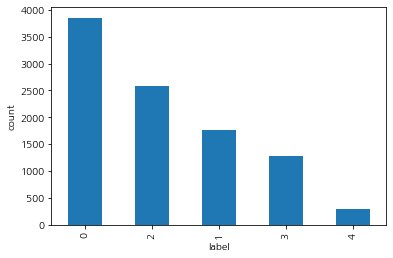

In [14]:
df_train_kaggle.label.value_counts().plot.bar()
plt.xlabel("label")
plt.ylabel("count")

In [15]:
train_generator = train_aug.flow_from_dataframe(
    dataframe = df_train_kaggle,
    directory = None,
    x_col="filepath",
    y_col="label",
    batch_size = 8,
    seed = 42,
    shuffle = True,
    class_mode = "raw",
    target_size = (224,224)
)

Found 9786 validated image filenames.


## 검증, 테스트 데이터

In [16]:
compi_root_path= "./KneeXray//KneeXray//"
df_val_compi = pd.read_csv(compi_root_path + "Train.csv")
df_val_compi["filename"] = df_val_compi.filename.apply(lambda x: compi_root_path+"train/" + x)
df_val_compi.head()

,filename,label
0,./KneeXray//KneeXray//train/Image_1.jpg,0
1,./KneeXray//KneeXray//train/Image_2.jpg,1
2,./KneeXray//KneeXray//train/Image_3.jpg,0
3,./KneeXray//KneeXray//train/Image_4.jpg,1
4,./KneeXray//KneeXray//train/Image_5.jpg,2


In [17]:
df_val_compi.shape

(7828, 2)

## 검증 데이터 분포

Text(0, 0.5, 'count')

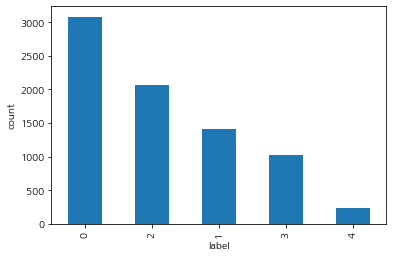

In [18]:
df_val_compi.label.value_counts().plot.bar()
plt.xlabel("label")
plt.ylabel("count")

In [19]:
valid_generator = valid_aug.flow_from_dataframe( 
    dataframe= df_val_compi,
    x_col = "filename",
    y_col = "label",
    batch_size = 8,
    seed = 42,
    shuffle = True,
    class_mode = "raw",
    target_size = (224,224)
)

Found 7828 validated image filenames.


## 모델 구조

In [20]:
from tensorflow.keras.applications import MobileNet

# xception = MobileNet(weights="imagenet")
# x =  xception.layers[-3].output
# #
# x = tf.keras.layers.Conv2D(filters = n_class, kernel_size = 3, padding = "same")(x)
# x = tf.keras.layers.BatchNormalization()(x)
# x = tf.keras.layers.Activation("relu")(x)
# #
# GAP = tf.keras.layers.GlobalAveragePooling2D()(x)
# pred = tf.keras.activations.softmax(GAP)

xception_model = MobileNet(weights=None, classes=5, classifier_activation="softmax")

    # Model(inputs=xception.input,outputs=pred)

In [21]:
xception_model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32

In [22]:
xception_model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.00001,decay=0.0001),
                 metrics=["acc"],
                 loss= tf.keras.losses.sparse_categorical_crossentropy)

checkpoint_path = "xception_best.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
my_callbacks = [
               ModelCheckpoint(
                   checkpoint_path,
                   monitor = 'val_acc',
                   verbose = 1,
                   save_weights_only=True,
                   save_best_only = True,
                   mode="max"
               ),
               EarlyStopping(
                   monitor='val_loss', 
                   patience=10,
                   verbose=0
               ),
               ReduceLROnPlateau(
                   monitor='val_loss', 
                   patience=10,
                   verbose=1)
]

## 가중치 부여

In [23]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight(
    'balanced',
    classes= np.unique(df_train_kaggle.label.values),
    y= df_train_kaggle.label.values
)

class_weights = dict(enumerate(class_weights))

## 학습

In [24]:
xception_model.fit(
        valid_generator,
        epochs = 300,
        validation_data = train_generator,
        callbacks = [my_callbacks],
        class_weight = class_weights
)

xception_model.load_weights(checkpoint_path)

Epoch 1/300
979/979 [==============================] - 61s 57ms/step - loss: 1.6592 - acc: 0.1540 - val_loss: 1.5972 - val_acc: 0.2040

Epoch 00001: val_acc improved from -inf to 0.20396, saving model to xception_best.ckpt
Epoch 2/300
979/979 [==============================] - 54s 55ms/step - loss: 1.6105 - acc: 0.1964 - val_loss: 1.6464 - val_acc: 0.1207

Epoch 00002: val_acc did not improve from 0.20396
Epoch 3/300
979/979 [==============================] - 55s 56ms/step - loss: 1.6209 - acc: 0.1866 - val_loss: 1.6184 - val_acc: 0.2125

Epoch 00003: val_acc improved from 0.20396 to 0.21255, saving model to xception_best.ckpt
Epoch 4/300
979/979 [==============================] - 55s 56ms/step - loss: 1.6003 - acc: 0.2220 - val_loss: 1.6236 - val_acc: 0.2061

Epoch 00004: val_acc did not improve from 0.21255
Epoch 5/300
979/979 [==============================] - 54s 56ms/step - loss: 1.5798 - acc: 0.2075 - val_loss: 1.6096 - val_acc: 0.2174

Epoch 00005: val_acc improved from 0.21255 

## 위의 학습에서 사용하였던 검증 데이터 세트에 대한 추가 학습

### 검증 데이터 세트를 학습, 검증 데이터 세트로 재구성하여 추가 학습 진행

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(
    df_train_kaggle, 
    test_size=0.1,
    random_state=42,
    stratify= df_train_kaggle.label
)

In [26]:
train_generator = train_aug.flow_from_dataframe(
    dataframe = X_train,
    x_col = "filepath",
    y_col = "label",
    batch_size = 8,
    seed = 42,
    shuffle = True,
    class_mode = "raw",
    target_size = (224,224)
)

Found 8807 validated image filenames.


In [27]:
valid_generator = valid_aug.flow_from_dataframe( 
    dataframe=X_test,
    x_col = "filepath",
    y_col = "label",
    batch_size = 8,
    seed = 42,
    shuffle = True,
    class_mode = "raw",
    target_size = (224,224)
)

Found 979 validated image filenames.


In [28]:
STEP_SIZE_TRAIN = train_generator.n//train_generator.batch_size
STEP_SIZE_VALID =valid_generator.n//valid_generator.batch_size

In [29]:
xception_model.fit(
    train_generator,
    steps_per_epoch=STEP_SIZE_TRAIN,
    epochs=50,
    validation_data=valid_generator,
    validation_steps=STEP_SIZE_VALID,callbacks=[my_callbacks]
)

Epoch 1/50
1100/1100 [==============================] - 41s 36ms/step - loss: 1.4582 - acc: 0.3813 - val_loss: 1.4201 - val_acc: 0.3934

Epoch 00001: val_acc improved from 0.27805 to 0.39344, saving model to xception_best.ckpt
Epoch 2/50
1100/1100 [==============================] - 39s 36ms/step - loss: 1.4073 - acc: 0.3933 - val_loss: 1.3998 - val_acc: 0.3904

Epoch 00002: val_acc did not improve from 0.39344
Epoch 3/50
1100/1100 [==============================] - 39s 36ms/step - loss: 1.3955 - acc: 0.3954 - val_loss: 1.3915 - val_acc: 0.3914

Epoch 00003: val_acc did not improve from 0.39344
Epoch 4/50
1100/1100 [==============================] - 39s 36ms/step - loss: 1.3943 - acc: 0.3955 - val_loss: 1.3980 - val_acc: 0.3924

Epoch 00004: val_acc did not improve from 0.39344
Epoch 5/50
1100/1100 [==============================] - 39s 36ms/step - loss: 1.3933 - acc: 0.3912 - val_loss: 1.3948 - val_acc: 0.3934

Epoch 00005: val_acc did not improve from 0.39344
Epoch 6/50
1100/1100 [===

In [30]:
xception_model.load_weights(checkpoint_path)

## 검증 데이터 Confusion Matrix

In [31]:
from sklearn.metrics import precision_recall_curve

target_shape = 224
BATCH_SIZE = 1

compi_gen = valid_aug.flow_from_dataframe(
    dataframe= X_test, 
    x_col= "filepath",
    class_mode=None,
    target_size= (target_shape, target_shape),
    shuffle= False,
    batch_size= BATCH_SIZE
)

Found 979 validated image filenames.


In [32]:
predicition_compi = xception_model.predict(compi_gen, steps= compi_gen.n/ BATCH_SIZE, verbose= 1)

979/979 [==============================] - 4s 3ms/step


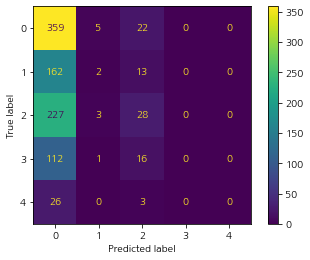

In [33]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

class_prediction_compi =  np.argmax(predicition_compi, axis= 1)
cm = confusion_matrix(X_test.label, class_prediction_compi, labels=[0, 1, 2, 3, 4])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1, 2, 3, 4])

disp.plot()

## 추가 테스트 데이터 Confusion Matrix

In [34]:
n_class = 5
test_root_path = "/home/Lee_KneeData/"
test_image_path_list = []
test_label_list = []

for label in range(n_class):
    test_image_list = os.listdir(f"{test_root_path}/{label}")
    test_image_path_list += [ f"{test_root_path}/{label}/"+ path for path in test_image_list]
    test_label_list += [label] * len(test_image_list)

df_test = pd.DataFrame({"filepath" : test_image_path_list, "label": test_label_list})
df_test

,filepath,label
0,/home/Lee_KneeData//0/5a21060fe4b0f1e9e5622e32...,0
1,/home/Lee_KneeData//0/5a21060fe4b0f1e9e5622e32...,0
2,/home/Lee_KneeData//0/5a21112ee4b09b69e603db16...,0
3,/home/Lee_KneeData//0/5a21112ee4b09b69e603db16...,0
4,/home/Lee_KneeData//0/5a28d27ae4b028f6846ae00a...,0
...,...,...
526,/home/Lee_KneeData//4/5b0e3cede4b07f99d60ee44d...,4
527,/home/Lee_KneeData//4/5b0f64cde4b0b80049bd1e8e...,4
528,/home/Lee_KneeData//4/5b10dab8e4b07f99d61002a5...,4
529,/home/Lee_KneeData//4/5b10dab8e4b07f99d61002a5...,4


In [35]:
df_test.shape

(531, 2)

## 추가 테스트 데이터 분포

Text(0, 0.5, 'count')

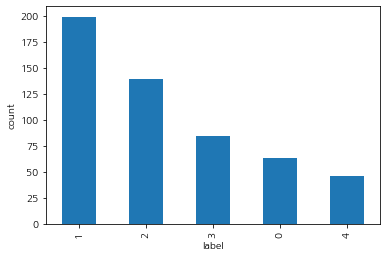

In [36]:
df_test.label.value_counts().plot.bar()
plt.xlabel("label")
plt.ylabel("count")

In [37]:
from sklearn.model_selection import train_test_split

seed = 42
test_da = train_test_split(
    df_test,
    test_size = 0.1,
    random_state = seed,
    stratify = df_test.label
  )

In [38]:
BS = 1
image_size = 224
seed = 42

da_test_generator = valid_aug.flow_from_dataframe(
    dataframe = df_test,
    directory = test_root_path,
    x_col = "filepath",
    y_col = 'label',
    batch_size = 1,
    seed = seed,
    shuffle = False,
    class_mode = None,
    target_size = (image_size, image_size)
  )

Found 531 validated image filenames.


In [39]:
predicition_test = xception_model.predict(da_test_generator, steps= da_test_generator.n/ BS, verbose= 1)

531/531 [==============================] - 2s 3ms/step


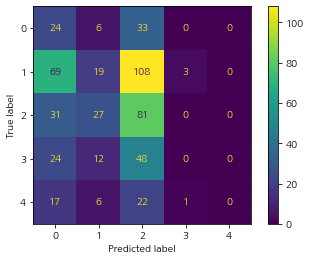

In [40]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

class_prediction_test =  np.argmax(predicition_test, axis= 1)
cm_test = confusion_matrix(df_test.label, class_prediction_test, labels=[0, 1, 2, 3, 4])
disp_test = ConfusionMatrixDisplay(confusion_matrix = cm_test, display_labels=[0, 1, 2, 3, 4])

disp_test.plot()

## DPhi에서 제공한 테스트 데이터 세트에 대한 예측 및 .csv파일 생성

In [41]:
test = pd.read_csv(compi_root_path + "Test.csv")

test_generator = valid_aug.flow_from_dataframe(
    dataframe= test,
    directory= compi_root_path + "test",
    x_col= "filename",
    y_col= None,
    batch_size= 1,
    seed= 42,
    shuffle= False,
    class_mode= None,
    target_size= (224,224)
)

STEP_SIZE_TEST=test_generator.n//test_generator.batch_size

Found 1958 validated image filenames.


In [42]:
pred = xception_model.predict(test_generator,steps=STEP_SIZE_TEST,verbose=1)
df_submit = pd.DataFrame({"label":np.argmax(pred, axis= 1)})
df_submit["label"].value_counts()

1958/1958 [==============================] - 6s 3ms/step


0    1763
2     181
1      14
Name: label, dtype: int64

In [43]:
xception_model.save_weights("knee_xray_Xceptionnet_GPA.h5")
df_submit.to_csv("submission.csv",index=False)